In [1]:
# 📥 Step 1: Load and Explore the Dataset

import pandas as pd

# Load the churn dataset
df = pd.read_csv("Churn_Modelling.csv")

# Basic structure
print("🔍 Dataset Shape:", df.shape)
print("\n🧾 Columns:\n", df.columns.tolist())

# Preview the data
print("\n📌 First 5 Rows:")
display(df.head())

# Check for missing values
print("\n🩺 Missing Values:\n", df.isnull().sum())

# Churn distribution
print("\n📊 Class Distribution (Exited):")
print(df['Exited'].value_counts())

# % of churned customers
churn_percent = df['Exited'].value_counts(normalize=True) * 100
print("\n💔 Churn Rate:\n", churn_percent.round(2))


🔍 Dataset Shape: (10000, 14)

🧾 Columns:
 ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

📌 First 5 Rows:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



🩺 Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

📊 Class Distribution (Exited):
Exited
0    7963
1    2037
Name: count, dtype: int64

💔 Churn Rate:
 Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


In [2]:
# 🧼 Step 2: Data Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Drop irrelevant columns
df_cleaned = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# 2. Encode categorical columns
le = LabelEncoder()
df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])  # Female=0, Male=1
df_cleaned = pd.get_dummies(df_cleaned, columns=['Geography'], drop_first=True)  # One-hot encode Geography

# 3. Define features and target
X = df_cleaned.drop('Exited', axis=1)
y = df_cleaned['Exited']

# 4. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Preprocessing done.")
print("🎯 Feature matrix shape:", X.shape)
print("📌 Target distribution:\n", y.value_counts(normalize=True).round(2) * 100)


✅ Preprocessing done.
🎯 Feature matrix shape: (10000, 11)
📌 Target distribution:
 Exited
0    80.0
1    20.0
Name: proportion, dtype: float64



📊 Results for Logistic Regression
✅ Accuracy: 0.8015
📝 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.47      0.07      0.13       393

    accuracy                           0.80      2000
   macro avg       0.64      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



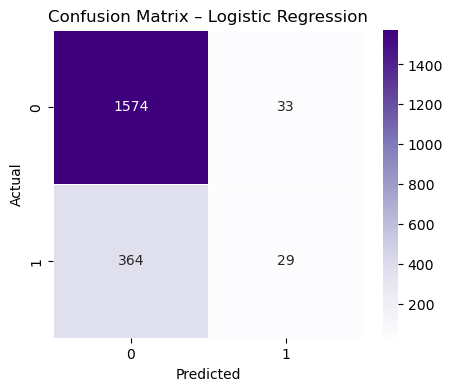


📊 Results for Random Forest
✅ Accuracy: 0.8660
📝 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



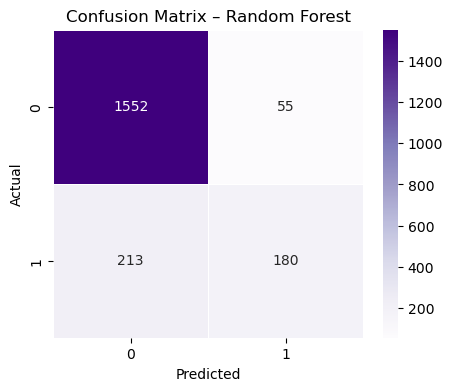


📊 Results for Gradient Boosting
✅ Accuracy: 0.8675
📝 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



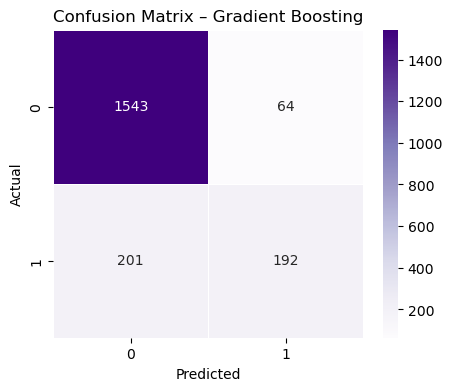

In [7]:
# 🤖 Step 3: Train and Evaluate Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 💡 Reusable evaluation function
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📊 Results for {model_name}")
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("📝 Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', linewidths=0.5)
    plt.title(f"Confusion Matrix – {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 🧠 Train all models
evaluate_model(LogisticRegression(max_iter=1000, solver='liblinear'), "Logistic Regression")
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")
evaluate_model(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42), "Gradient Boosting")


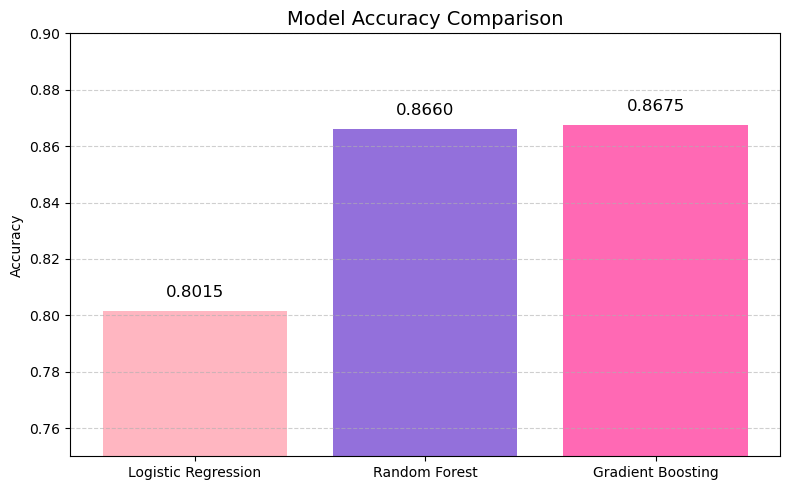

In [4]:
import matplotlib.pyplot as plt

# Models and their accuracies
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [0.8015, 0.8660, 0.8675]

# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['#FFB6C1', '#9370DB', '#FF69B4'])
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy')
plt.ylim(0.75, 0.90)

# Add values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval:.4f}', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


📝 Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



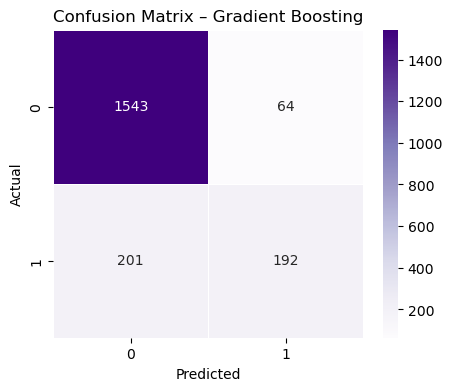

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Run after training Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification report
print("📝 Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', linewidths=0.5)
plt.title("Confusion Matrix – Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\SANJEEV R\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SANJEEV R\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SANJEEV R\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


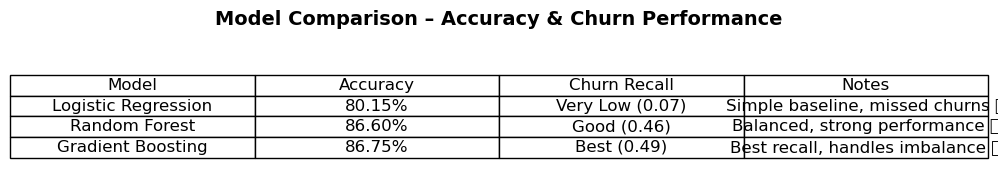

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Table data
data = {
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "Accuracy": ["80.15%", "86.60%", "86.75%"],
    "Churn Recall": ["Very Low (0.07)", "Good (0.46)", "Best (0.49)"],
    "Notes": [
        "Simple baseline, missed churns ❌",
        "Balanced, strong performance ✅",
        "Best recall, handles imbalance 🌟"
    ]
}

df = pd.DataFrame(data)

# Plot as table
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.title("Model Comparison – Accuracy & Churn Performance", fontweight="bold", fontsize=14, pad=20)
plt.tight_layout()
plt.show()
